In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
data = pd.read_csv('./retail_sales_dataset.csv')
data.head(5)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


### Data processing

In [7]:
#convert date to month and day of week by first transforming from object to datetime
data['Date'] = pd.to_datetime(data['Date'])
data['Month'] = data['Date'].dt.month
data['Day of Week'] = data['Date'].dt.dayofweek
data

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Month,Day of Week
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,11,4
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,2,0
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,1,4
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,5,6
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,5,5
...,...,...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50,5,1
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90,11,4
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100,10,6
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150,12,1


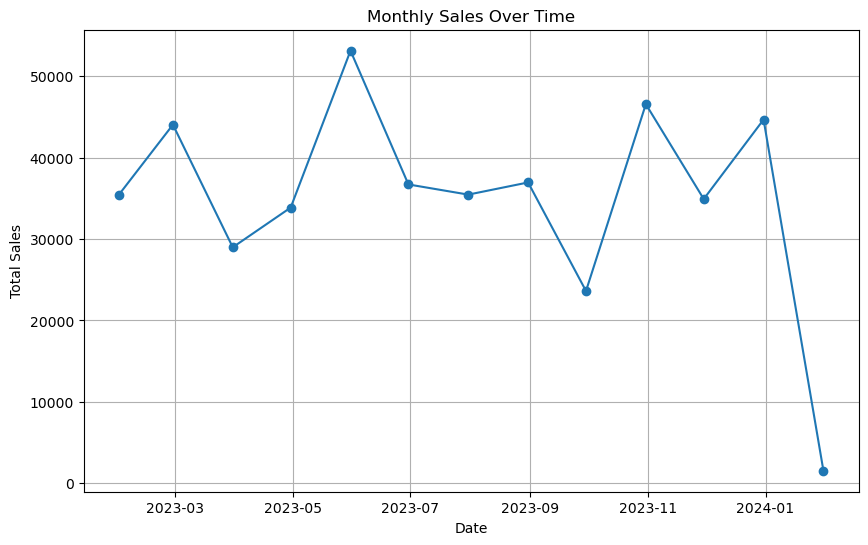

In [8]:
#Time Series Visualization 

data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
monthly_sales = data['Total Amount'].resample('M').sum()
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o')
plt.title('Monthly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

In [9]:
# Feature engineering
#  data for 'Demand Elasticity', 'Competitor Pricing', and 'Customer Preferences'

np.random.seed(42)  # For reproducibility
data['Demand Elasticity'] = np.random.uniform(0.5, 2.0, len(data))  # Random values between 0.5 and 2.0
data['Competitor Pricing'] = data['Price per Unit'] * np.random.uniform(0.8, 1.2, len(data))  # Simulate competitor prices

data

,Transaction ID,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Month,Day of Week,Demand Elasticity,Competitor Pricing
Date,,,,,,,,,,,,
2023-11-24,1,CUST001,Male,34,Beauty,3,50,150,11,4,1.061810,43.702659
2023-02-27,2,CUST002,Female,26,Clothing,2,500,1000,2,0,1.926071,508.380189
2023-01-13,3,CUST003,Male,50,Electronics,1,30,30,1,4,1.597991,34.475350
2023-05-21,4,CUST004,Male,37,Clothing,1,500,500,5,6,1.397988,546.444977
2023-05-06,5,CUST005,Male,30,Beauty,2,50,100,5,5,0.734028,56.131223
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-16,996,CUST996,Male,62,Clothing,1,50,50,5,1,0.637373,53.139103
2023-11-17,997,CUST997,Male,52,Beauty,3,30,90,11,4,1.875970,35.479375
2023-10-29,998,CUST998,Female,23,Beauty,4,25,100,10,6,0.705228,20.689580


In [10]:
#We will use the Product Category as the customer's preferences. So let's convert it to a numerical value
data['Product Category'] = pd.Categorical(data['Product Category']).codes
data

,Transaction ID,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Month,Day of Week,Demand Elasticity,Competitor Pricing
Date,,,,,,,,,,,,
2023-11-24,1,CUST001,Male,34,0,3,50,150,11,4,1.061810,43.702659
2023-02-27,2,CUST002,Female,26,1,2,500,1000,2,0,1.926071,508.380189
2023-01-13,3,CUST003,Male,50,2,1,30,30,1,4,1.597991,34.475350
2023-05-21,4,CUST004,Male,37,1,1,500,500,5,6,1.397988,546.444977
2023-05-06,5,CUST005,Male,30,0,2,50,100,5,5,0.734028,56.131223
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-16,996,CUST996,Male,62,1,1,50,50,5,1,0.637373,53.139103
2023-11-17,997,CUST997,Male,52,0,3,30,90,11,4,1.875970,35.479375
2023-10-29,998,CUST998,Female,23,0,4,25,100,10,6,0.705228,20.689580


In [11]:
# Drop rows with missing values if any
data.dropna(inplace=True)

In [12]:
# Prepare data for modeling
# Select relevant features and target
# Features: Age, Price per Unit, Demand Elasticity, Competitor Pricing, Month, Day of Week
# Target: Price per Unit
X = data[['Age', 'Product Category', 'Quantity', 'Demand Elasticity', 'Competitor Pricing', 'Month', 'Day of Week']]
y = data['Price per Unit']

In [13]:
# Split the data into train, validation, and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Train a simple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [15]:
# Evaluate the model
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

print(f"Train R-squared: {train_score:.4f}")
print(f"Test R-squared: {test_score:.4f}")

Train R-squared: 0.9761
Test R-squared: 0.9727


In [16]:
# Predict the price per unit on the test set
y_pred = model.predict(X_test)

In [17]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")

Mean Squared Error: 974.4119751533663
R2 Score: 0.9726673021921397


In [18]:
# Function to predict optimal price given Demand Elasticity, Competitor Pricing, and Product Category - Customer Preferences
def predict_optimal_price(input: pd.DataFrame):
    predicted_price = model.predict(input)
    return predicted_price[0]


In [19]:
#random data selection
random = data[['Age', 'Product Category', 'Quantity', 'Demand Elasticity', 'Competitor Pricing', 'Month', 'Day of Week']].sample(n=1) 

prediction = predict_optimal_price(random)

print(f"Optimal Price per Unit: {prediction: 2f}")


Optimal Price per Unit:  30.789359


In [20]:
# Let's save our data and model before deployment
data.to_csv('final_dataset.csv', index=False) 

In [21]:
#Let's use joblib to save our model
import joblib

joblib.dump(model, 'model.joblib')

['model.joblib']